In [1]:
import pandas as pd
import gensim
# import gensim.downloader as api

from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances


import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import norm

In [2]:
# similar sound-producing mechanism (hyperacoustics)
impact = ["bump", "drop", "fall", "bounce", "clap", "slam", "clang", "step", "punch"]
explosion = ["blast", "explode", "bang", "blow up", "burst"]
vocal = ["talk", "scream", "hiss", "yell", "chant", "conversation", "murmur", "shout"]
nose = ["wheeze", "sneeze", "snort", "snore", "smell"]

# similar semantics
locomotion = ["walk", "gallop", "run" , "march", "jump", "move"]
dog = ["howl", "bark", "snarl", "growl", "whimper", "scratch", "pant"]
vehicle = ["rev", "drive", "pass", "accelerate", "brake"]
complex_sound = ["fight", "box", "gunshot", "destruction", "accident", "wrestle", "bowl", "exercise"]

words = [*impact, *explosion, *vocal, *nose, *locomotion, *dog, *vehicle, *complex_sound]

In [29]:
semantic_similar = [
    [*["locomotion"]*len(locomotion), *["dog"]*len(dog), *["vehicle"]*len(vehicle)],
    [*locomotion, *dog, *vehicle],
]

acoustic_similar = [
    [*["impact"]*len(impact), *["explosion"]*len(explosion), *["vocal"]*len(vocal), *["nose"]*len(nose)],
    [*impact, *explosion, *vocal, *nose],
]

semantic_tuples = list(zip(*semantic_similar))
acoustic_tuples = list(zip(*acoustic_similar))

In [30]:
pwd

'C:\\Users\\Martin\\Desktop\\embedding_comparison_similarity_matrix'

In [31]:
# OWL2Vec* word embedding model
o2vmodel = gensim.models.Word2Vec.load(
    "../owl2vec-sounds/OWL2Vec-Star-0.2.0/.ontology.embeddings")

# Word2Vec word embedding model (300 dim) 
w2vmodel = gensim.models.KeyedVectors.load_word2vec_format(
    r'C:\Users\Martin\Documents\Elia_Research_Internship\Datasets\GoogleNews-vectors-negative300.bin.gz', binary=True)

In [47]:
# function to create df of words and their embeddings for later plotting
def create_df(model, words):
    # commands working for fully pretrained models 
    if type(model) == gensim.models.word2vec.Word2Vec:
        word_list = [word for word in words if word in model.wv.key_to_index] 
        vectors = [model.wv.get_vector(word) for word in words if word in model.wv.index_to_key] 
    # commands working for custom models
    else:
        word_list = [word for word in words if word in model.key_to_index] 
        vectors = [model.get_vector(word) for word in words if word in model.index_to_key] 
    df = pd.DataFrame(data=vectors, index=word_list)
    return df

In [49]:
w2v_df = create_df(w2vmodel, words)
o2v_df = create_df(o2vmodel, words)

In [33]:
w2v_df_sem = create_df(w2vmodel, semantic_similar[0])
w2v_df_aco = create_df(w2vmodel, acoustic_similar[0])

o2v_df_sem = create_df(o2vmodel, semantic_similar[0])
o2v_df_aco = create_df(o2vmodel, acoustic_similar[0})

In [34]:
w2v_df_sem.head(n=5)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
walk,0.000248,-0.008728,-0.125000,0.457031,-0.060059,-0.051270,-0.048584,-0.208984,-0.154297,0.140625,...,-0.225586,0.310547,-0.175781,0.141602,0.072266,0.059814,-0.037354,-0.279297,-0.079590,-0.073242
gallop,0.129883,0.265625,-0.234375,-0.010986,0.133789,-0.365234,0.189453,0.074707,-0.029419,0.137695,...,-0.025513,0.011719,-0.246094,0.417969,0.169922,0.188477,0.217773,0.144531,-0.107422,-0.223633
run,-0.073242,0.083984,-0.007446,0.039795,0.052002,-0.208008,0.011963,-0.225586,0.020020,0.263672,...,-0.032227,0.151367,-0.257812,0.075684,0.080566,-0.065918,-0.006805,-0.170898,-0.150391,-0.054199
march,0.081543,0.279297,-0.018555,0.210938,0.119141,-0.378906,-0.031738,-0.134766,-0.261719,0.161133,...,0.035889,-0.129883,-0.084473,0.192383,0.208008,0.132812,0.052979,-0.182617,0.003113,0.110840
jump,0.052002,0.036133,-0.103516,0.128906,-0.004242,-0.373047,0.037598,0.168945,0.094727,0.193359,...,0.050781,0.184570,-0.310547,0.039307,-0.180664,-0.337891,-0.110840,0.104004,0.024536,-0.056641


In [35]:
w2v_df_aco.head(n=5)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
bump,0.131836,-0.019165,-0.125977,0.291016,-0.052490,-0.031982,-0.138672,-0.333984,0.027222,0.376953,...,0.133789,-0.060059,-0.112793,-0.045898,-0.174805,-0.157227,-0.015747,-0.086426,-0.033936,-0.069336
drop,-0.042725,-0.179688,0.025391,0.160156,-0.076172,-0.035889,-0.312500,0.021362,0.296875,0.398438,...,0.075684,0.003891,-0.073242,0.052246,-0.048096,-0.155273,-0.210938,0.089844,-0.023926,0.066406
fall,-0.042725,0.107422,-0.092773,0.168945,-0.132812,-0.106934,0.043213,0.019043,0.146484,0.150391,...,-0.088379,0.015015,-0.203125,-0.165039,0.042236,-0.226562,-0.093262,0.069336,0.263672,0.013611
bounce,-0.088867,0.130859,-0.103516,0.062988,-0.120605,-0.084961,-0.177734,0.023315,0.142578,0.240234,...,-0.155273,0.271484,0.119141,-0.222656,-0.001442,0.041504,0.199219,-0.107422,0.026611,-0.190430
clap,0.205078,-0.187500,0.110840,0.273438,-0.451172,-0.535156,0.225586,0.002213,-0.021484,0.210938,...,-0.016968,0.240234,-0.300781,-0.139648,0.302734,-0.025269,0.129883,-0.165039,-0.153320,0.233398


In [36]:
# cosine similarity matrix
# 1-distance matrix with the cosine distance as a metric = similarity matrix
# 1-distance matrix with the cosine distance as a metric = similarity matrix
def create_similarity_matrix_df(df, metric):
    vector = df.to_numpy()
    matrix = 1-pairwise_distances(df.to_numpy(), metric=metric) # similarity based on euclidean, cosine or correlation

    #index = pd.MultiIndex.from_tuples(tuples)

    matrix_df = pd.DataFrame(data=matrix, columns=df.index, index=df.index)
    
    # matrix_df.style.set_properties(**{'text-align': 'left'})
    return matrix_df.style.background_gradient(axis=None, cmap='RdBu') # changing color

In [37]:
create_similarity_matrix_df(w2v_df_sem, "euclidean")

,walk,gallop,run,march,jump,move,howl,bark,snarl,growl,whimper,scratch,pant,rev,drive,pass,accelerate,brake
walk,1.000000,-2.747867,-1.514086,-2.146262,-2.304053,-1.830889,-2.744408,-2.779454,-2.964988,-3.050920,-3.226613,-2.513488,-3.079988,-2.974042,-1.862086,-2.245797,-2.684751,-3.301079
gallop,-2.747867,1.000000,-2.361201,-2.903023,-2.698839,-2.664268,-3.099473,-3.222142,-3.326720,-3.258412,-3.476073,-3.125628,-3.325815,-3.141087,-2.669868,-2.725222,-3.065764,-3.560441
run,-1.514086,-2.361201,1.000000,-2.211658,-1.797013,-1.403131,-2.534470,-2.566647,-2.654774,-2.914501,-2.847167,-2.173109,-2.910939,-2.457089,-1.249435,-1.674890,-2.207623,-2.934110
march,-2.146262,-2.903023,-2.211658,1.000000,-2.821640,-2.146583,-2.856875,-3.371721,-3.088472,-3.418417,-3.378472,-3.232832,-3.580218,-3.224147,-2.117082,-2.589501,-2.977905,-3.672480
jump,-2.304053,-2.698839,-1.797013,-2.821640,1.000000,-1.744097,-2.902889,-3.016374,-3.048549,-3.215291,-3.470264,-2.572132,-3.142225,-2.651815,-2.125475,-2.251646,-2.527941,-3.106637
move,-1.830889,-2.664268,-1.403131,-2.146583,-1.744097,1.000000,-2.565574,-2.771549,-2.587143,-2.901159,-3.072985,-2.372509,-2.840086,-2.436265,-1.608364,-1.834071,-1.996742,-2.872056
howl,-2.744408,-3.099473,-2.534470,-2.856875,-2.902889,-2.565574,1.000000,-2.362309,-2.421866,-1.853177,-2.563621,-3.006827,-3.117244,-2.842240,-2.695444,-2.847650,-3.060216,-3.555171
bark,-2.779454,-3.222142,-2.566647,-3.371721,-3.016374,-2.771549,-2.362309,1.000000,-2.749571,-2.488407,-3.202004,-2.829240,-3.134004,-3.257507,-2.976257,-3.055432,-3.117023,-3.535751
snarl,-2.964988,-3.326720,-2.654774,-3.088472,-3.048549,-2.587143,-2.421866,-2.749571,1.000000,-2.385034,-3.020963,-3.238193,-3.283394,-2.850295,-2.587824,-2.760055,-3.017234,-3.338317
growl,-3.050920,-3.258412,-2.914501,-3.418417,-3.215291,-2.901159,-1.853177,-2.488407,-2.385034,1.000000,-3.107469,-3.274181,-3.226439,-2.903550,-3.012193,-3.198712,-3.364119,-3.450342


In [38]:
create_similarity_matrix_df(w2v_df_aco, "euclidean")

,bump,drop,fall,bounce,clap,slam,clang,step,punch,blast,explode,bang,burst,talk,scream,hiss,yell,chant,conversation,murmur,shout,wheeze,sneeze,snort,snore,smell
bump,1.000000,-1.661686,-1.754499,-2.114098,-2.856549,-2.340021,-3.280408,-2.244864,-2.194352,-2.860209,-2.585487,-2.142876,-2.434427,-2.232430,-2.430001,-2.752750,-2.772851,-3.651898,-2.923950,-2.903602,-2.433525,-2.933708,-2.674035,-3.083329,-3.035385,-3.275268
drop,-1.661686,1.000000,-1.139356,-2.080600,-2.741053,-2.363688,-3.123167,-2.256394,-2.317491,-2.777913,-2.397686,-2.349420,-2.412112,-2.254691,-2.555870,-2.784354,-2.798934,-3.491160,-2.916398,-3.121115,-2.444437,-2.942659,-2.905534,-3.290551,-3.129458,-3.082336
fall,-1.754499,-1.139356,1.000000,-2.100714,-2.711381,-2.425918,-3.158389,-2.191747,-2.319698,-2.869659,-2.337694,-2.287261,-2.303462,-2.086190,-2.446459,-2.696311,-2.812552,-3.406116,-2.705794,-2.955691,-2.455647,-2.916267,-2.704432,-3.352414,-2.945083,-3.007490
bounce,-2.114098,-2.080600,-2.100714,1.000000,-2.924001,-2.626483,-3.399969,-2.659720,-2.566734,-3.045886,-2.865691,-2.579607,-2.632684,-2.664904,-2.897881,-3.210143,-3.201812,-3.683872,-3.398472,-3.570381,-2.764430,-3.398745,-3.326251,-3.708367,-3.397624,-3.280991
clap,-2.856549,-2.741053,-2.711381,-2.924001,1.000000,-2.723828,-2.940428,-3.013091,-2.842115,-3.308859,-3.081399,-2.735480,-2.943890,-2.624702,-2.203130,-2.390541,-2.083610,-2.379984,-2.966216,-2.577637,-1.958674,-3.103069,-2.787470,-3.036478,-2.860542,-3.333120
slam,-2.340021,-2.363688,-2.425918,-2.626483,-2.723828,1.000000,-3.013891,-2.598647,-2.377610,-2.718740,-2.642509,-2.348197,-2.490121,-2.400077,-2.347402,-2.942511,-2.652303,-3.285111,-2.984499,-3.220911,-2.324304,-3.225503,-3.127437,-3.359863,-3.384943,-3.456060
clang,-3.280408,-3.123167,-3.158389,-3.399969,-2.940428,-3.013891,1.000000,-3.588659,-3.187444,-3.484750,-3.187393,-2.917002,-3.339736,-3.224624,-2.722954,-2.709294,-3.071611,-3.614245,-3.454310,-3.160928,-2.862386,-3.433607,-3.728395,-3.665695,-3.496030,-3.481584
step,-2.244864,-2.256394,-2.191747,-2.659720,-3.013091,-2.598647,-3.588659,1.000000,-2.613720,-3.018867,-3.046994,-2.698836,-2.737179,-2.278869,-2.859965,-3.081407,-2.995178,-3.563419,-2.827769,-3.311243,-2.627868,-3.083501,-3.367350,-3.563721,-3.431914,-3.367629
punch,-2.194352,-2.317491,-2.319698,-2.566734,-2.842115,-2.377610,-3.187444,-2.613720,1.000000,-2.977248,-2.722834,-2.276665,-2.565066,-2.580884,-2.538677,-2.884697,-2.861037,-3.469746,-2.880865,-3.281068,-2.527880,-3.129180,-3.178514,-3.117818,-3.224583,-3.298418
blast,-2.860209,-2.777913,-2.869659,-3.045886,-3.308859,-2.718740,-3.484750,-3.018867,-2.977248,1.000000,-2.506263,-2.750968,-2.586922,-2.968183,-3.053297,-3.209270,-3.438067,-3.802897,-3.338346,-3.488963,-3.008433,-3.414540,-3.525211,-3.835374,-3.519805,-3.360717


In [39]:
create_similarity_matrix_df(o2v_df_sem, "euclidean")

,walk,gallop,run,march,jump,move,howl,bark,growl,scratch,pant,rev,drive,pass,accelerate,brake
walk,1.000000,0.357033,0.674997,0.244658,0.276989,0.067219,0.255627,0.322413,0.375393,0.362998,0.492307,0.500533,0.561679,0.592280,0.413924,0.351829
gallop,0.357033,1.000000,0.643076,0.859217,0.885330,0.695825,0.865023,0.900499,0.897623,0.908141,0.829072,0.813725,0.486775,0.576062,0.893992,0.908296
run,0.674997,0.643076,1.000000,0.526830,0.560547,0.355830,0.538293,0.602449,0.640300,0.655531,0.747951,0.790975,0.599524,0.690771,0.703190,0.639104
march,0.244658,0.859217,0.526830,1.000000,0.914999,0.802547,0.909133,0.875948,0.834712,0.832316,0.730232,0.703163,0.406323,0.484167,0.803018,0.847939
jump,0.276989,0.885330,0.560547,0.914999,1.000000,0.773335,0.910138,0.902190,0.863762,0.857501,0.762209,0.736519,0.431650,0.513656,0.832789,0.872376
move,0.067219,0.695825,0.355830,0.802547,0.773335,1.000000,0.795560,0.726499,0.675264,0.676979,0.558871,0.533313,0.242984,0.318087,0.638250,0.689943
howl,0.255627,0.865023,0.538293,0.909133,0.910138,0.795560,1.000000,0.885292,0.850190,0.836958,0.744639,0.710211,0.409846,0.489347,0.811886,0.842382
bark,0.322413,0.900499,0.602449,0.875948,0.902190,0.726499,0.885292,1.000000,0.903064,0.881016,0.810214,0.772199,0.474507,0.557724,0.862821,0.889963
growl,0.375393,0.897623,0.640300,0.834712,0.863762,0.675264,0.850190,0.903064,1.000000,0.865866,0.855800,0.801546,0.514513,0.597944,0.876334,0.873484
scratch,0.362998,0.908141,0.655531,0.832316,0.857501,0.676979,0.836958,0.881016,0.865866,1.000000,0.826478,0.831192,0.506255,0.596726,0.898301,0.904973


In [40]:
create_similarity_matrix_df(o2v_df_aco, "euclidean")

,bump,drop,fall,bounce,clap,slam,clang,step,punch,blast,explode,bang,burst,talk,scream,hiss,yell,chant,conversation,murmur,shout,wheeze,sneeze,snort,snore
bump,1.000000,0.247752,0.539148,0.662303,0.010385,0.676605,0.856492,-0.008294,0.258401,0.854068,0.811578,0.803616,0.795164,0.534655,0.644790,0.884972,0.582238,0.858617,0.608344,0.562949,0.503690,0.547341,0.437113,0.426502,0.885152
drop,0.247752,1.000000,0.692155,-0.035914,0.161927,-0.021506,0.148693,0.056889,0.299987,0.150038,0.127955,0.092387,0.091422,-0.150214,-0.046075,0.233873,-0.108836,0.166142,-0.082729,-0.134726,-0.187945,0.458861,0.431289,0.470431,0.213018
fall,0.539148,0.692155,1.000000,0.253869,0.178258,0.268531,0.440469,0.108277,0.388834,0.441822,0.414990,0.384173,0.382116,0.135637,0.241013,0.522156,0.178307,0.455618,0.205861,0.152588,0.098908,0.644624,0.569052,0.590294,0.504271
bounce,0.662303,-0.035914,0.253869,1.000000,-0.258780,0.921650,0.776010,-0.266880,-0.024056,0.779914,0.804015,0.828359,0.835239,0.842171,0.905041,0.696437,0.881037,0.751760,0.900576,0.864074,0.822505,0.231217,0.133900,0.114195,0.716231
clap,0.010385,0.161927,0.178258,-0.258780,1.000000,-0.235315,-0.090668,0.668630,0.640123,-0.091419,-0.147876,-0.136378,-0.160663,-0.367740,-0.292069,-0.052340,-0.345872,-0.102833,-0.309185,-0.360158,-0.400288,0.351063,0.508630,0.474014,-0.062637
slam,0.676605,-0.021506,0.268531,0.921650,-0.235315,1.000000,0.785221,-0.245849,-0.003726,0.789426,0.807278,0.834148,0.833171,0.826437,0.892869,0.705205,0.857703,0.757250,0.887172,0.842986,0.803281,0.245810,0.152319,0.130826,0.723838
clang,0.856492,0.148693,0.440469,0.776010,-0.090668,0.785221,1.000000,-0.099834,0.158579,0.915487,0.890656,0.904336,0.890421,0.648267,0.758301,0.864576,0.694789,0.901067,0.723269,0.678075,0.620124,0.434320,0.327118,0.313950,0.886720
step,-0.008294,0.056889,0.108277,-0.266880,0.668630,-0.245849,-0.099834,1.000000,0.695751,-0.110091,-0.166380,-0.147996,-0.172084,-0.378101,-0.303808,-0.076733,-0.355062,-0.117964,-0.320975,-0.365408,-0.405163,0.332312,0.488221,0.451153,-0.086617
punch,0.258401,0.299987,0.388834,-0.024056,0.640123,-0.003726,0.158579,0.695751,1.000000,0.149877,0.094999,0.106209,0.084905,-0.142673,-0.056244,0.192940,-0.112739,0.147541,-0.079290,-0.126260,-0.172443,0.617314,0.773427,0.733115,0.181862
blast,0.854068,0.150038,0.441822,0.779914,-0.091419,0.789426,0.915487,-0.110091,0.149877,1.000000,0.897446,0.890675,0.889735,0.653085,0.761751,0.873331,0.700378,0.901451,0.725403,0.680279,0.622660,0.429395,0.323304,0.309045,0.889360


In [41]:

# standard dimensionality reduction setup (tSNE, PCA?)
def initiate_tsne(df):
    tsne = TSNE(n_components = 2, 
                perplexity = 10, 
                learning_rate = 400, 
                init = 'random',
                metric= "cosine",
                random_state = 10,
                square_distances=(True))

    tsne_df = tsne.fit_transform(df)
    return tsne_df


In [42]:
# plotting function
def plotting(df, tsne_df, title):

    plt.scatter(tsne_df[:,0],
                tsne_df[:,1],
                s=30,
                alpha = 1)

    # Initialize list of texts
    texts = []
    words_to_plot = list(np.arange(0, len(tsne_df), 1))

    # Append words to list (positions on plot)
    for word in words_to_plot:
        texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 20)) # plot text at position on x, y 

    plt.title(title, fontsize=24)
    

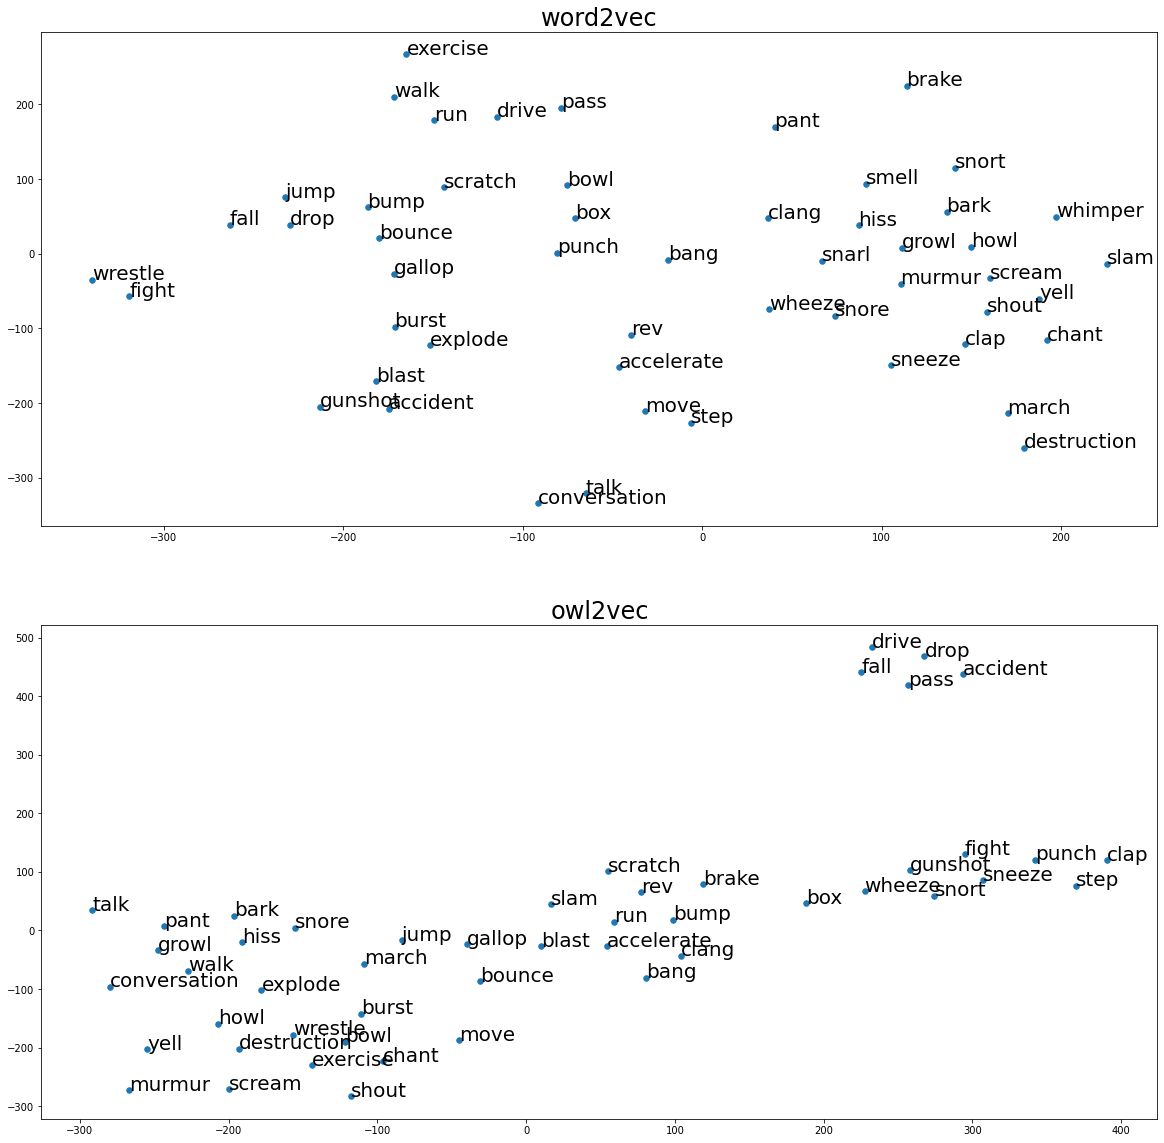

In [50]:
fig = plt.figure(figsize=(20,20))

# plotting w2v_df
fig.add_subplot(2,1,1)
plotting(w2v_df, initiate_tsne(w2v_df), "word2vec")

# plotting o2v_df
fig.add_subplot(2,1,2)
plotting(o2v_df, initiate_tsne(o2v_df), "owl2vec")

plt.show() 
